<a href="https://colab.research.google.com/github/Corazons/guns_darma_l_s_p/blob/main/Pertemuan_4_Data_Modelling_2_Logistic_Regression_Contoh_Kasus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Hands-On
---
Hands-On ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 8

### Daftar Isi :
Membangun Model dan Mengevaluasi Hasil Pemodelan
- Supervised Learning
    - Klasifikasi
    1. Menggunakan machine learning
    2. Menggunakan deep learning
    
- Unsupervised Learning

### Supervised Learning dan Unsupervised Learning

<center>
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*H4D11uM2V6wcgK4k.png"  width="300" />
    <figcaption>Ilustrasi Supervised dan Unsupervised Learning</figcaption>
</center>

### Supervised Learning
Supervised learning adalah jenis pembelajaran mesin di mana algoritma diajari menggunakan data yang sudah diberi label. Dalam supervised learning, ada variabel target (variabel dependen) yang ingin diprediksi, dan algoritma dilatih untuk menghubungkan fitur atau atribut yang ada dalam data dengan target yang telah diberikan (variabel independen).

Supervised learning biasanya digunakan untuk dua hal utama :
- Classification
- Regression

Beberapa algoritma supervised learning :
1. Linear Regression
2. Logistic Regression
3. K-Nearest Neighbours
4. Decision Trees
5. SVM
6. Naive Bayes
7. Neural Networks

### Unsupervised Learning
Unsupervised learning adalah jenis pembelajaran mesin di mana algoritma dilatih dari data yang tidak memiliki label atau target yang jelas. Dalam unsupervised learning, tujuannya adalah menemukan pola, struktur, dan hubungan tersembunyi dalam data tanpa arahan yang eksplisit.

Umumnya unsupervised learning digunakan untuk tiga hal utama:
- Clustering
- Association
- Dimensionality reduction

Salah satu contoh unsupervised Learning algorithms :
1. K-Means

### 1. Membangun Model Supervised Learning dan Mengevaluasi Hasil Pemodelan

---

### 1.1.2 Logistic Regression
-----

<center>
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg"  width="500" />
</center>

In [ ]:
# Import Library
import pandas as pd

In [ ]:
df = pd.read_csv('delay_maskapai.csv')

In [ ]:
# Membuang Kolom "Flight"
df = df.iloc[:,1:]

In [ ]:
df.head(3)

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,870.0,180.0,CO,IAH,PHX,5,0
1,365.0,66.0,OO,DSM,MKE,2,0
2,740.0,257.0,DL,SEA,CVG,7,0


In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.160256,0.771084,CO,IAH,PHX,5,0
1,-0.918803,-0.602410,OO,DSM,MKE,2,0
2,-0.117521,1.698795,DL,SEA,CVG,7,0
3,-0.427350,1.433735,WN,SNA,MDW,7,1
4,-0.566239,0.204819,CO,IAH,MCO,6,1


Tujuan dari logistic regression adalah untuk mempelajari hubungan antara variabel independen dan probabilitas terjadinya suatu kejadian atau kelas dalam bentuk nilai diskrit (biasanya 0 atau 1). Logistic regression menggunakan fungsi logistik (atau sigmoid) untuk menghasilkan prediksi yang berada dalam rentang antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas.

Tipe-tipe Logistic Regression
1. Binary Logistic Regression : Adalah Logistic Regression yang hanya memiliki 2 output saja (mengklasifikasi kedalam 2 kelas berbeda). Contoh: Positif-Negatif, Obesitas-Tidak Obesitas, Delay-Tidak Delay.

2. Multinomial Logistic Regression : Adalah Logistic Regression yang memiliki 2 output atau lebih (mengklasifikasi kedalam 2 kelas berbeda). Contohnya kelas Sentiment Analysis kalimat positif, negatif, dan netral.

3. Ordinal Logistic Regression : Adalah Logistic Regression yang memiliki 2 output atau lebih dengan memperhatikan urutan. (mengklasifikasi kedalam 2 kelas berbeda dengan memperhatikan urutan). Contohnya adalah membagi kelas mahasiswa dalam range Index Prestasi Kumulatif 1.xx, 2.xx, 3.xx, dan 4.00.

In [ ]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [ ]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [ ]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.160256,0.771084,4,125,199,4,0
1,-0.918803,-0.602410,12,76,170,1,0
2,-0.117521,1.698795,5,235,64,6,0
3,-0.427350,1.433735,15,245,162,6,1
4,-0.566239,0.204819,4,125,160,5,1


In [ ]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [ ]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
# Membuat Model - LogisticRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000)

- solver='lbfgs': Parameter solver digunakan untuk memilih algoritma optimasi yang digunakan untuk mempelajari koefisien model. 'lbfgs' adalah salah satu algoritma yang umum digunakan untuk logistic regression dan cocok untuk dataset yang cukup besar.

- max_iter=1000: Parameter max_iter menentukan jumlah maksimum iterasi yang akan dilakukan oleh algoritma optimasi. Nilai 1000 mengindikasikan bahwa algoritma akan melakukan hingga 1000 iterasi jika belum mencapai konvergensi.

In [ ]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
# Membuat Confusion Matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1364,  459],
       [ 922,  492]])

Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. Ada empat istilah yang merupakan representasi hasil proses klasifikasi pada confusion matrix yaitu
1. True Positif : Anda memprediksi positif dan itu benar. Anda memprediksikan bahwa maskapai tersebut delay dan maskapai tersebut memang delay.
2. True Negatif : Anda memprediksi negatif dan itu benar. Anda memprediksikan bahwa maskapai tersebut tidak delay dan maskapai tersebut memang tidak delay.
3. False Positif : Anda memprediksi positif dan itu salah. Anda memprediksikan bahwa maskapai tersebut delay tetapi maskapai tersebut tidak delay
4. False Negatif : Anda memprediksi negatif dan itu salah. Anda memprediksikan bahwa maskapai tersebut tidak delay tetapi maskapai tersebut delay

<center>
    <img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg"  width="500" />
</center>

Text(0.5, 257.44, 'Predicted label')

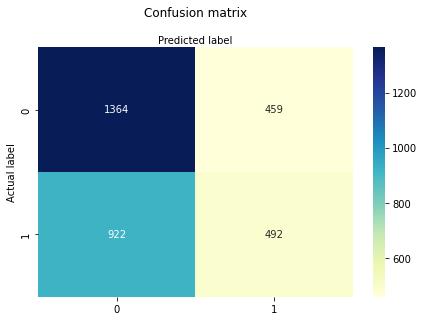

In [ ]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Import library
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

 Not Delayed       0.60      0.75      0.66      1823
     Delayed       0.52      0.35      0.42      1414

    accuracy                           0.57      3237
   macro avg       0.56      0.55      0.54      3237
weighted avg       0.56      0.57      0.56      3237



#### Precision
Precision (Presisi): Precision mengukur sejauh mana kelas yang diprediksi sebagai positif (misalkan 'Delayed') adalah benar. Precision dihitung dengan rumus: TP / (TP + FP), di mana TP adalah True Positive (jumlah sampel positif yang diprediksi dengan benar) dan FP adalah False Positive (jumlah sampel negatif yang salah diprediksi sebagai positif). Precision berkisar antara 0 dan 1, di mana nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.
    
Untuk kelas "Not Delayed", precision adalah 0.60, yang berarti 60% dari prediksi "Not Delayed" adalah benar. Untuk kelas "Delayed", precision adalah 0.55, yang berarti 55% dari prediksi "Delayed" adalah benar.

#### Recall
Recall (Recall): Recall mengukur sejauh mana kelas positif (misalkan 'Delayed') yang ditemukan oleh model. Recall dihitung dengan rumus: TP / (TP + FN), di mana TP adalah True Positive (jumlah sampel positif yang diprediksi dengan benar) dan FN adalah False Negative (jumlah sampel positif yang salah diprediksi sebagai negatif). Recall juga berkisar antara 0 dan 1, di mana nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.

Untuk kelas "Not Delayed", recall adalah 0.77, yang berarti model dapat menemukan 77% dari data yang sebenarnya adalah "Not Delayed". Untuk kelas "Delayed", recall adalah 0.36, yang berarti model hanya dapat menemukan 36% dari data yang sebenarnya adalah "Delayed".

#### F1-Score
F1-score: F1-score adalah harmonik rata-rata presisi dan recall. F1-score menggabungkan presisi dan recall menjadi satu angka yang mencerminkan keseimbangan antara keduanya. F1-score dihitung dengan rumus: 2 * (Precision * Recall) / (Precision + Recall). Seperti precision dan recall, F1-score juga berkisar antara 0 dan 1, dan nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.

Untuk kelas "Not Delayed", f1-score adalah 0.67, yang mencerminkan keseimbangan antara precision dan recall untuk kelas tersebut. Untuk kelas "Delayed", f1-score adalah 0.43.

#### Support
Support adalah jumlah sampel yang termasuk dalam setiap kelas. Dalam konteks laporan klasifikasi, support menunjukkan jumlah sampel aktual yang memiliki label kelas tertentu.

Terdapat 89,984 sampel yang sebenarnya adalah "Not Delayed" dan 71,831 sampel yang sebenarnya adalah "Delayed"

#### Accuracy
Akurasi adalah sejauh mana model dapat memprediksi secara benar keseluruhan kelas. Dalam kasus ini, akurasi adalah 0.58, yang berarti model dapat memprediksi dengan benar 58% dari keseluruhan sampel.

#### Macro average
Macro average (rata-rata makro): Rata-rata makro adalah rata-rata dari metrik evaluasi (precision, recall, dan f1-score) untuk setiap kelas secara terpisah. Dalam kasus ini, rata-rata makro adalah 0.57 untuk precision, 0.56 untuk recall, dan 0.55 untuk f1-score.

#### Weighted average
Weighted average (rata-rata berbobot): Rata-rata berbobot adalah rata-rata dari metrik evaluasi (precision, recall, dan f1-score) untuk setiap kelas dengan mempertimbangkan jumlah sampel dalam setiap kelas. Dalam kasus ini, rata-rata berbobot adalah 0.58 untuk precision, 0.58 untuk recall, dan 0.56 untuk f1-score.

####  Menghitung dan menampilkan kurva ROC (Receiver Operating Characteristic) serta menghitung AUC (Area Under the Curve)

ROC dan AUC adalah metode evaluasi yang umum digunakan untuk mengukur performa model klasifikasi.
- Kurva ROC digunakan untuk memvisualisasikan performa model klasifikasi dalam membedakan antara kelas positif dan negatif dengan memvariasikan threshold. Semakin tinggi kurva ROC, semakin baik model dalam membedakan kedua kelas.

- AUC merupakan ukuran dari luas area di bawah kurva ROC, yang menggambarkan seberapa baik model dapat membedakan kelas positif dan negatif secara keseluruhan. Semakin tinggi nilai AUC, semakin baik performa model klasifikasi tersebut.

In [ ]:
import matplotlib.pyplot as plt

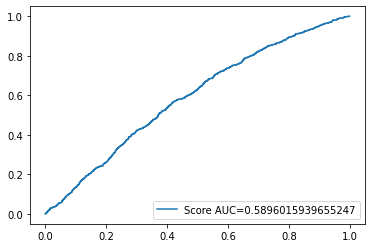

In [ ]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi reg untuk data uji (X_test)
y_pred_proba = reg.predict_proba(X_test)[::,1]

# Menghitung false positive rate (fpr), true positive rate (tpr), dan threshold yang terkait dengan kurva ROC.
fpr, tpr, _ = metrics.roc_curve(y_test, #Label aktual
                                y_pred_proba)

# Menghitung nilai AUC dari kurva ROC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Membuat plot untuk kurva ROC
plt.plot(fpr,tpr
         ,label="Score AUC="+str(auc)) #Label "Score AUC" ditambahkan ke legenda untuk menampilkan nilai AUC di grafik

# Menampilkan legenda di lokasi keempat (kanan bawah) pada grafik
plt.legend(loc=4)

# Menampilkan grafik
plt.show()

#### Perbedaan Linear & Logistic Regression

<center>
    <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Table1Linearvs.Logistic.png"  width="500" />
</center>